[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_62/3185931629.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
/tmp/ipykernel_62/3185931629.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell


Accuracy: 0.8627450980392157


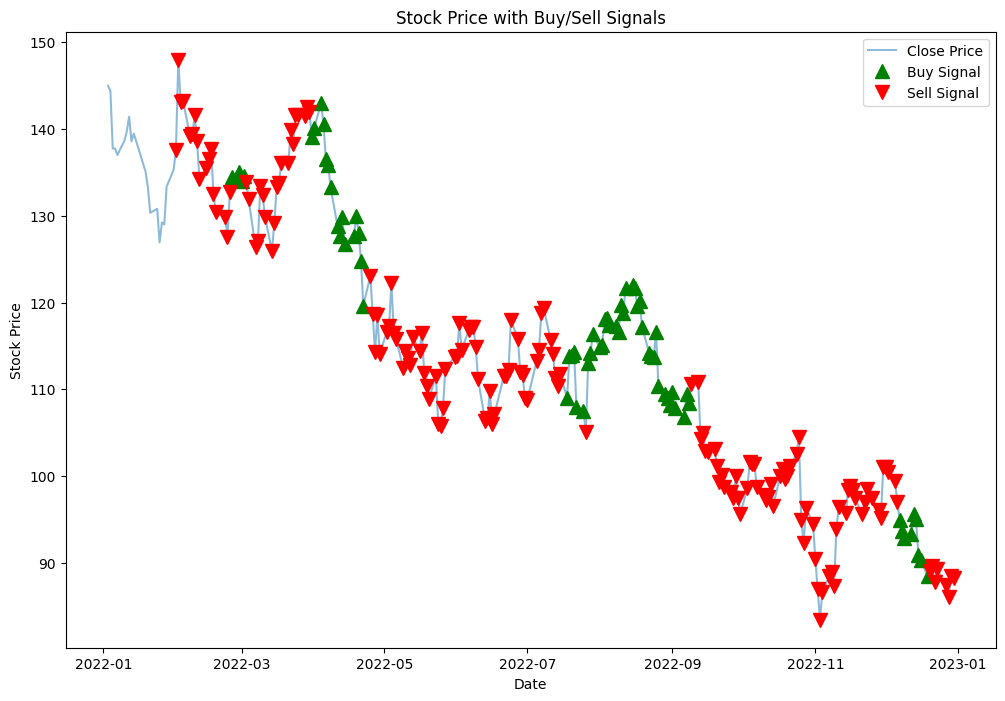

In [13]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt
# from datetime import datetime
# import yfinance as yf

# # Fetch real-time stock data using yfinance
# def fetch_real_time_stock_data(ticker, period="1d"):
#     stock_data = yf.download(ticker, period=period)
#     return stock_data

# # Feature Engineering
# def add_features(data):
#     data['Date'] = data.index
#     data['Year'] = data['Date'].dt.year
#     data['Month'] = data['Date'].dt.month
#     data['Day'] = data['Date'].dt.day
#     data['DayOfWeek'] = data['Date'].dt.dayofweek
#     data['DailyReturn'] = data['Close'].pct_change()

#     # Simple Moving Averages (SMA)
#     data['SMA_20'] = data['Close'].rolling(window=20).mean()
#     data['SMA_50'] = data['Close'].rolling(window=50).mean()

# # Prepare Features and Target
# def prepare_data(data):
#     features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'DayOfWeek', 'DailyReturn', 'SMA_20', 'SMA_50']
#     X = data[features].dropna()
#     y = np.where(X['SMA_20'] > X['SMA_50'], 1, 0)  # Buy (1) when short-term SMA > long-term SMA, else Hold (0)
#     X = X.drop(['SMA_20', 'SMA_50'], axis=1)
#     return X, y

# # Train a Random Forest Classifier model
# def train_model(X_train, y_train):
#     model = RandomForestClassifier(random_state=42)
#     param_grid = {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     }
#     grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
#     return best_model

# # Evaluate the model
# def evaluate_model(model, X_test, y_test):
#     predictions = model.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     print(f'Accuracy: {accuracy}')

# # Plot Buy/Hold signals
# def plot_signals(stock_data, signals):
#     plt.figure(figsize=(12, 8))
#     plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
#     plt.plot(stock_data.loc[signals['Buy']].index, stock_data['Close'][signals['Buy']], '^', markersize=10, color='g', label='Buy Signal')
#     plt.title('Stock Price with Buy/Hold Signals')
#     plt.xlabel('Date')
#     plt.ylabel('Stock Price')
#     plt.legend()
#     plt.show()

# # Main function
# def main():
#     # Fetch real-time stock data for demonstration (replace with your stock symbol)
#     ticker = 'AAPL'
#     stock_data = fetch_real_time_stock_data(ticker)

#     # Feature engineering
#     add_features(stock_data)

#     # Prepare data
#     X, y = prepare_data(stock_data)

#     # Split data into training and testing sets with fixed train_size
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.7, random_state=42)

#     # Train the model
#     model = train_model(X_train, y_train)

#     # Evaluate the model
#     evaluate_model(model, X_test, y_test)

#     # Generate buy/hold signals
#     signals = pd.DataFrame(index=stock_data.index)
#     signals['Buy'] = model.predict(X)
#     signals['Hold'] = 1 - signals['Buy']  # If not Buy, then Hold

#     # Plot buy/hold signals
#     plot_signals(stock_data, signals)

# if __name__ == "__main__":
#     main()


# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt
# import yfinance as yf

# # Fetch historical stock data using yfinance
# def fetch_stock_data(ticker, start_date, end_date):
#     stock_data = yf.download(ticker, start=start_date, end=end_date)
#     return stock_data

# # Feature Engineering: Simple Moving Averages (SMA)
# def add_sma(data, short_window, long_window):
#     data['Short_SMA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
#     data['Long_SMA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# # Generate buy/sell signals based on SMA crossover strategy
# def generate_signals(data):
#     data['Signal'] = 0  # 0 indicates Hold
#     data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
#     data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell

# # Prepare Features and Target
# def prepare_data(data):
#     features = ['Short_SMA', 'Long_SMA']
#     X = data[features].dropna()
#     y = np.sign(X['Short_SMA'] - X['Long_SMA'])
#     return X, y

# # Train a Random Forest Classifier model
# def train_model(X_train, y_train):
#     model = RandomForestClassifier(random_state=42)
#     model.fit(X_train, y_train)
#     return model

# # Evaluate the model
# def evaluate_model(model, X_test, y_test):
#     predictions = model.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     print(f'Accuracy: {accuracy}')

# # Plot Buy/Sell signals
# def plot_signals(data):
#     plt.figure(figsize=(12, 8))
#     plt.plot(data['Close'], label='Close Price', alpha=0.5)
#     plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
#     plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
#     plt.title('Stock Price with Buy/Sell Signals')
#     plt.xlabel('Date')
#     plt.ylabel('Stock Price')
#     plt.legend()
#     plt.show()

# # Main function
# def main():
#     # Fetch historical stock data for demonstration (replace with your stock symbol and date range)
#     ticker = 'AAPL'
#     start_date = '2022-01-01'
#     end_date = '2022-12-31'
#     stock_data = fetch_stock_data(ticker, start_date, end_date)

#     # Feature engineering
#     add_sma(stock_data, short_window=20, long_window=50)
#     generate_signals(stock_data)

#     # Prepare data
#     X, y = prepare_data(stock_data)

#     # Split data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Train the model
#     model = train_model(X_train, y_train)

#     # Evaluate the model
#     evaluate_model(model, X_test, y_test)

#     # Plot buy/sell signals
#     plot_signals(stock_data)

# if __name__ == "__main__":
#     main()


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Feature Engineering: Simple Moving Averages (SMA)
def add_sma(data, short_window, long_window):
    data['Short_SMA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_SMA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate buy/sell signals based on SMA crossover strategy
def generate_signals(data):
    data['Signal'] = 0  # 0 indicates Hold
    data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
    data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell

# Prepare Features and Target
def prepare_data(data):
    features = ['Short_SMA', 'Long_SMA']
    X = data[features].dropna()
    y = np.sign(X['Short_SMA'] - X['Long_SMA'])
    return X, y

# Train a Random Forest Classifier model with hyperparameter tuning
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    return best_model

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy}')

# Plot Buy/Sell signals
def plot_signals(data):
    plt.figure(figsize=(12, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.5)
    plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
    plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
    plt.title('Stock Price with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main function
def main():
    # Fetch historical stock data for demonstration (replace with your stock symbol and date range)
    #ticker = 'AAPL'
    ticker = 'GOOGL'
    start_date = '2022-01-01'
    end_date = '2022-12-31'
    stock_data = fetch_stock_data(ticker, start_date, end_date)

    # Feature engineering
    add_sma(stock_data, short_window=20, long_window=50)
    generate_signals(stock_data)

    # Prepare data
    X, y = prepare_data(stock_data)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model with hyperparameter tuning
    model = train_model(X_train, y_train)

    # Evaluate the model
    evaluate_model(model, X_test, y_test)

    # Plot buy/sell signals
    plot_signals(stock_data)

if __name__ == "__main__":
    main()



In [8]:
!pip install numpy pandas scikit-learn matplotlib yfinance


[*********************100%%**********************]  1 of 1 completed
Accuracy: 0.8627450980392157


/tmp/ipykernel_62/3123416353.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
/tmp/ipykernel_62/3123416353.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell


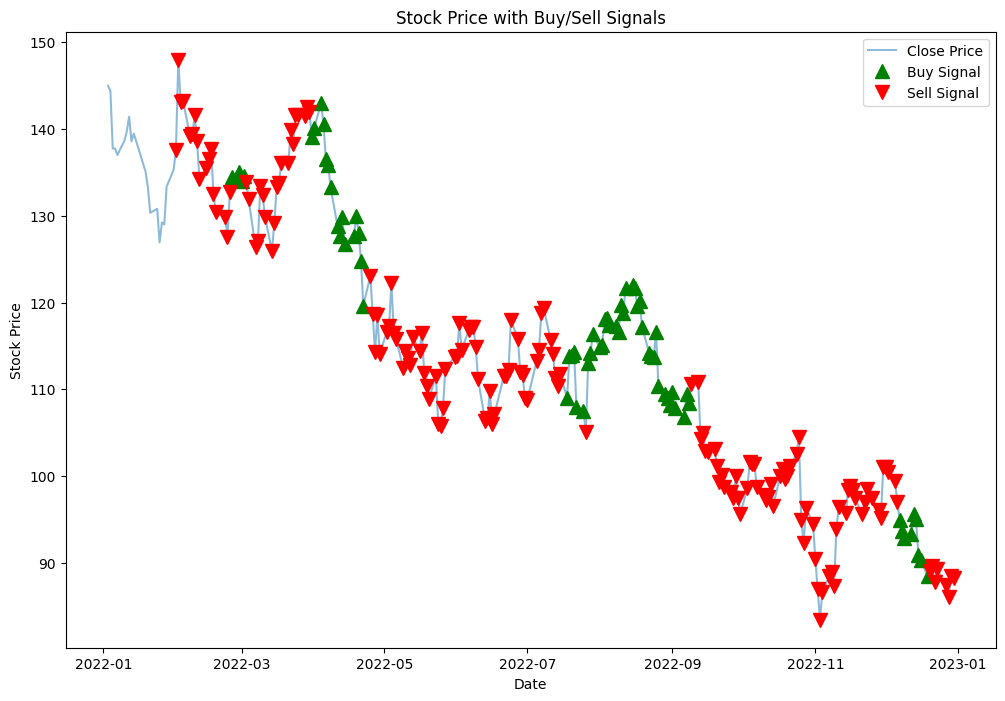

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Feature Engineering: Simple Moving Averages (SMA)
def add_sma(data, short_window, long_window):
    data['Short_SMA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_SMA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate buy/sell signals based on SMA crossover strategy
def generate_signals(data):
    data['Signal'] = 0  # 0 indicates Hold
    data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
    data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell

# Prepare Features and Target
def prepare_data(data):
    features = ['Short_SMA', 'Long_SMA']
    X = data[features].dropna()
    y = np.sign(X['Short_SMA'] - X['Long_SMA'])
    return X, y

# Train a Random Forest Classifier model
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy}')

# Plot Buy/Sell signals
def plot_signals(data):
    plt.figure(figsize=(12, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.5)
    plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
    plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
    plt.title('Stock Price with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main function
def main():
    # Fetch historical stock data for demonstration (replace with your stock symbol and date range)
    ticker = 'GOOGL'
    start_date = '2022-01-01'
    end_date = '2022-12-31'
    stock_data = fetch_stock_data(ticker, start_date, end_date)

    # Feature engineering
    add_sma(stock_data, short_window=20, long_window=50)
    generate_signals(stock_data)

    # Prepare data
    X, y = prepare_data(stock_data)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = train_model(X_train, y_train)

    # Evaluate the model
    evaluate_model(model, X_test, y_test)

    # Plot buy/sell signals
    plot_signals(stock_data)

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_62/2549038571.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
/tmp/ipykernel_62/2549038571.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell


Accuracy: 0.8235294117647058


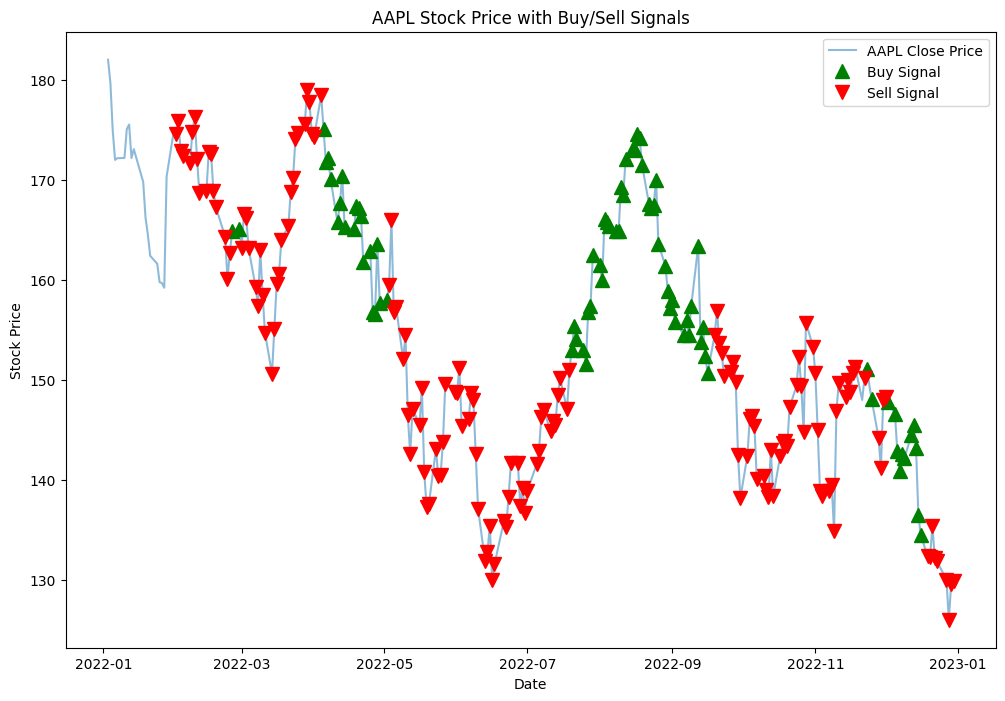

[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_62/2549038571.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
/tmp/ipykernel_62/2549038571.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell


Accuracy: 0.8627450980392157


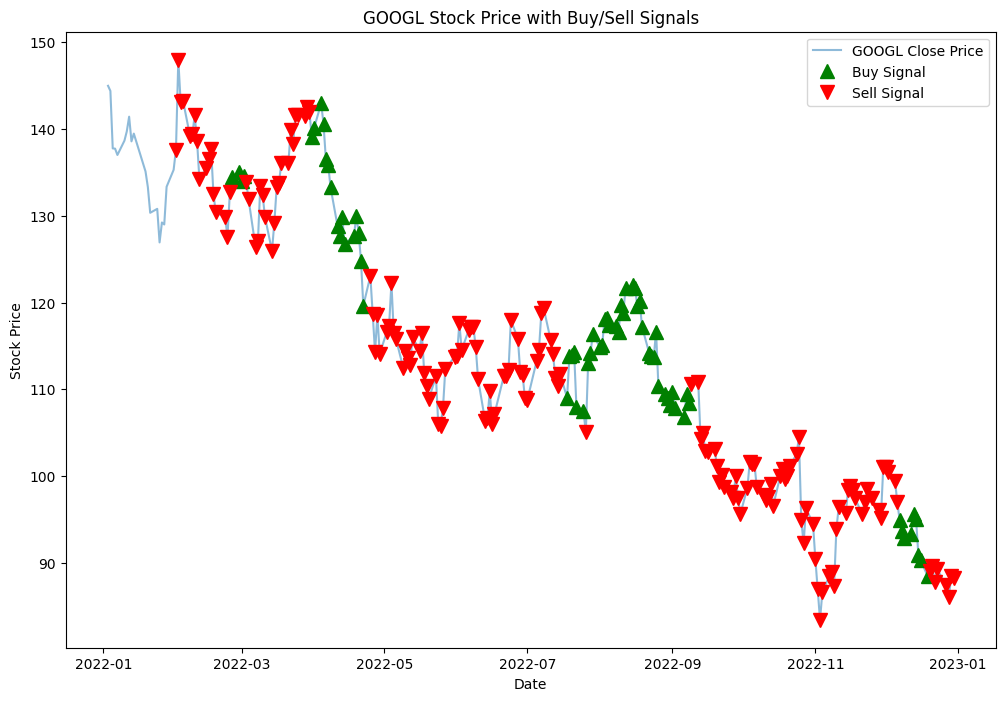

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Feature Engineering: Simple Moving Averages (SMA)
def add_sma(data, short_window, long_window):
    data['Short_SMA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_SMA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate buy/sell signals based on SMA crossover strategy
def generate_signals(data):
    data['Signal'] = 0  # 0 indicates Hold
    data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
    data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell

# Prepare Features and Target
def prepare_data(data):
    features = ['Short_SMA', 'Long_SMA']
    X = data[features].dropna()
    y = np.sign(X['Short_SMA'] - X['Long_SMA'])
    return X, y

# Train a Random Forest Classifier model with hyperparameter tuning
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    return best_model

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy}')

# Plot Buy/Sell signals
def plot_signals(data, ticker):
    plt.figure(figsize=(12, 8))
    plt.plot(data['Close'], label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
    plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
    plt.title(f'{ticker} Stock Price with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main function
def main():
    # Fetch historical stock data for Apple (AAPL)
    ticker_aapl = 'AAPL'
    start_date_aapl = '2022-01-01'
    end_date_aapl = '2022-12-31'
    stock_data_aapl = fetch_stock_data(ticker_aapl, start_date_aapl, end_date_aapl)

    # Feature engineering for Apple
    add_sma(stock_data_aapl, short_window=20, long_window=50)
    generate_signals(stock_data_aapl)

    # Prepare data for Apple
    X_aapl, y_aapl = prepare_data(stock_data_aapl)

    # Split data into training and testing sets for Apple
    X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = train_test_split(X_aapl, y_aapl, test_size=0.2, random_state=42)

    # Train the model with hyperparameter tuning for Apple
    model_aapl = train_model(X_train_aapl, y_train_aapl)

    # Evaluate the model for Apple
    evaluate_model(model_aapl, X_test_aapl, y_test_aapl)

    # Plot buy/sell signals for Apple
    plot_signals(stock_data_aapl, ticker_aapl)

    # Fetch historical stock data for Google (GOOGL)
    ticker_googl = 'GOOGL'
    start_date_googl = '2022-01-01'
    end_date_googl = '2022-12-31'
    stock_data_googl = fetch_stock_data(ticker_googl, start_date_googl, end_date_googl)

    # Feature engineering for Google
    add_sma(stock_data_googl, short_window=20, long_window=50)
    generate_signals(stock_data_googl)

    # Prepare data for Google
    X_googl, y_googl = prepare_data(stock_data_googl)

    # Split data into training and testing sets for Google
    X_train_googl, X_test_googl, y_train_googl, y_test_googl = train_test_split(X_googl, y_googl, test_size=0.2, random_state=42)

    # Train the model with hyperparameter tuning for Google
    model_googl = train_model(X_train_googl, y_train_googl)

    # Evaluate the model for Google
    evaluate_model(model_googl, X_test_googl, y_test_googl)

    # Plot buy/sell signals for Google
    plot_signals(stock_data_googl, ticker_googl)

if __name__ == "__main__":
    main()


  AAPl


[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_62/1479058300.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
/tmp/ipykernel_62/1479058300.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell


Accuracy: 0.8235294117647058
Predicted future movement for AAPl: -1.0


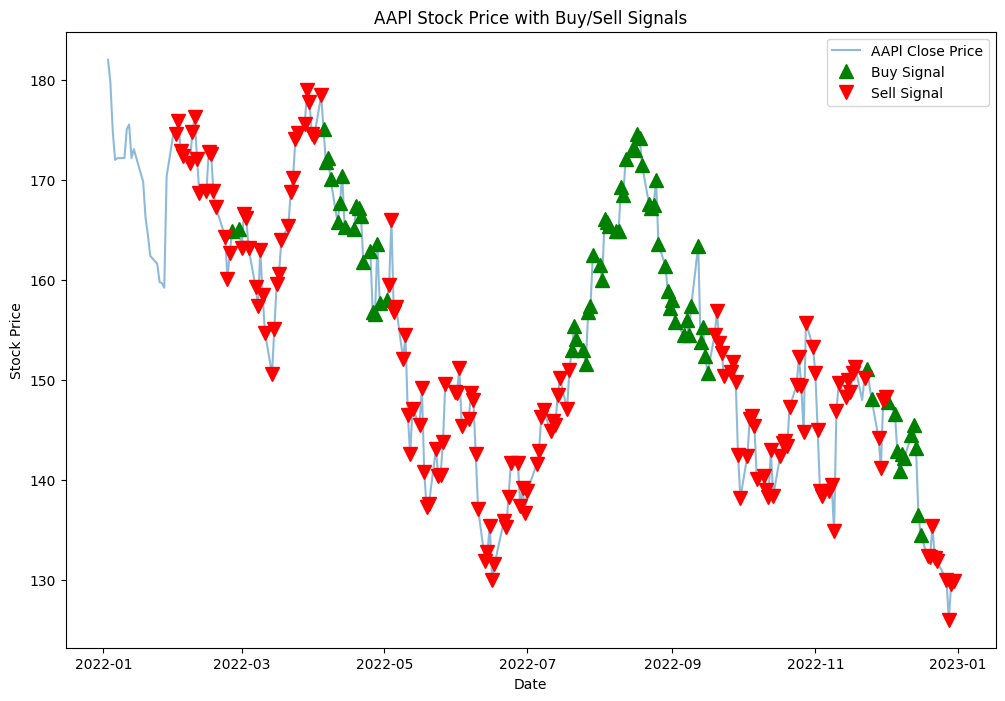

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Feature Engineering: Simple Moving Averages (SMA)
def add_sma(data, short_window, long_window):
    data['Short_SMA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_SMA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate buy/sell signals based on SMA crossover strategy
def generate_signals(data):
    data['Signal'] = 0  # 0 indicates Hold
    data['Signal'][data['Short_SMA'] > data['Long_SMA']] = 1  # 1 indicates Buy
    data['Signal'][data['Short_SMA'] < data['Long_SMA']] = -1  # -1 indicates Sell

# Prepare Features and Target
def prepare_data(data):
    features = ['Short_SMA', 'Long_SMA']
    X = data[features].dropna()
    y = np.sign(X['Short_SMA'] - X['Long_SMA'])
    return X, y

# Train a Random Forest Classifier model with hyperparameter tuning
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    return best_model

# Predict future movements
def predict_future_movements(model, X_future):
    predictions = model.predict(X_future)
    return predictions

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy}')

# Plot Buy/Sell signals
def plot_signals(data, ticker):
    plt.figure(figsize=(12, 8))
    plt.plot(data['Close'], label=f'{ticker} Close Price', alpha=0.5)
    plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
    plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
    plt.title(f'{ticker} Stock Price with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main function
def main():
    # Fetch historical stock data for Apple (AAPL)
    ticker_aapl = input(" ")
    start_date_aapl = '2022-01-01'
    end_date_aapl = '2022-12-31'
    stock_data_aapl = fetch_stock_data(ticker_aapl, start_date_aapl, end_date_aapl)

    # Feature engineering for Apple
    add_sma(stock_data_aapl, short_window=20, long_window=50)
    generate_signals(stock_data_aapl)

    # Prepare data for Apple
    X_aapl, y_aapl = prepare_data(stock_data_aapl)

    # Split data into training and testing sets for Apple
    X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = train_test_split(X_aapl, y_aapl, test_size=0.2, random_state=42)

    # Train the model with hyperparameter tuning for Apple
    model_aapl = train_model(X_train_aapl, y_train_aapl)

    # Evaluate the model for Apple
    evaluate_model(model_aapl, X_test_aapl, y_test_aapl)

    # Predict future movements for Apple
    X_future_aapl = X_aapl.tail(1)  # Using the most recent data as a placeholder for future prediction
    future_predictions_aapl = predict_future_movements(model_aapl, X_future_aapl)
    print(f'Predicted future movement for {ticker_aapl}: {future_predictions_aapl[0]}')

    # Plot buy/sell signals for Apple
    plot_signals(stock_data_aapl, ticker_aapl)


if __name__ == "__main__":
    main()

# -1 is mean stock not buying/sell
# 1 is mean stock is buying / buy